In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm.auto import tqdm

In [3]:
arr = np.load('/Users/wingillis/gdrive/datta/for_Win/Sxx_allPixels.npy', mmap_mode='r')
print(arr.shape)

# re-order axes so that time (the largest axis) is the first dimension
arr = np.moveaxis(arr, [2, 0, 1], [0, 1, 2])
print(arr.shape)

In [4]:
batch = 8000
_range = range(0, len(arr) + batch, batch)
slices = [slice(start, min(end, len(arr))) for start, end in zip(_range, _range[1:])]

## Make sure the data is the same

I changed the order of the array dimensions, but I want to quickly verify that data in each dimension is in its correct position.

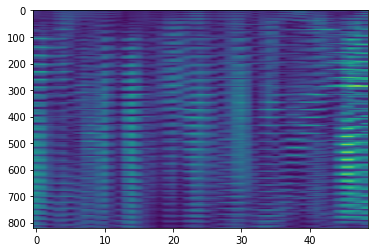

In [25]:
a1 = arr[0, ..., 0]
plt.imshow(a1, aspect='auto')

In [23]:
arr2 = np.load('/Users/wingillis/gdrive/datta/for_Win/Sxx_allPixels.npy', mmap_mode='r')

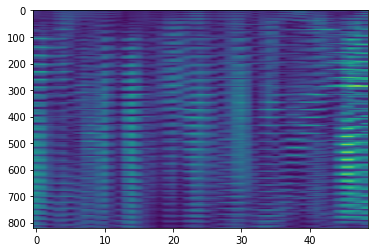

In [26]:
a2 = arr2[:, :, 0, 0]
plt.imshow(a2, aspect='auto')

In [27]:
np.all(a1 == a2)  # they're the same

True

### Save re-organized numpy array to h5 file

In [5]:
with h5py.File('/Users/wingillis/gdrive/datta/for_Win/Sxx_allPixels.h5', 'w') as h5f:
  h5f.create_dataset('data', shape=arr.shape)
  for sl in tqdm(slices):
    h5f['data'][sl] = arr[sl]